In [23]:
# assign directory
import git
from pathlib import Path
import os
#from rembg import remove
from PIL import Image
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))
NAME = "sagittal"
data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','syntheticMRI2D',NAME, 'toy-raw')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 8

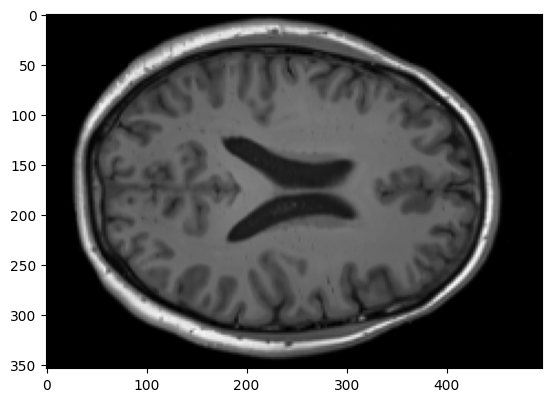

In [24]:
img = Image.open(file_list[2]).convert("L")
plt.imshow(img, cmap = "gray")
plt.imshow(img, cmap = "gray")

In [25]:
file_names[0]

'sub-006626-sagittal-slice.png'

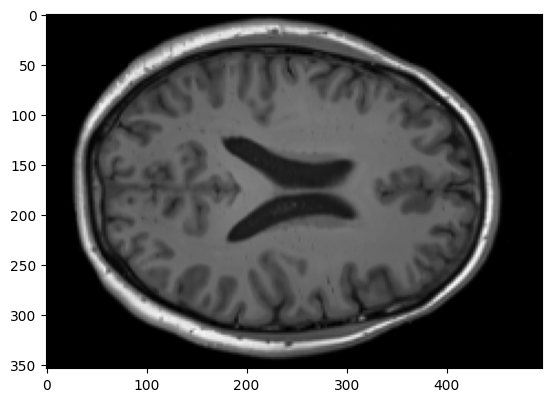

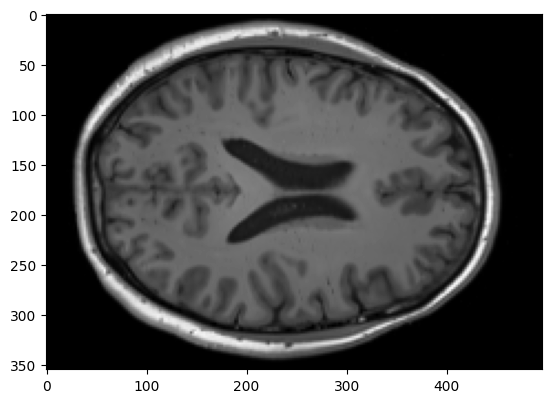

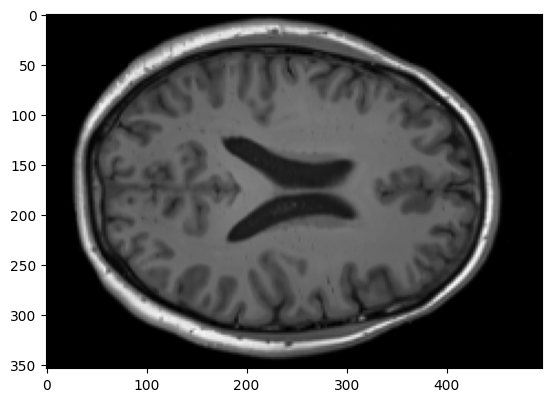

In [26]:
from scipy import ndimage

img = np.array(Image.open(file_list[2]).convert("L")).astype(np.float16)
plt.imshow(img, cmap="gray")
plt.show()
img_border = img.copy()
img_border = np.vstack((np.full((1, img_border.shape[1]), 100), img_border))
plt.imshow(img_border, cmap="gray")
plt.show()
img_fill_holes = ndimage.binary_fill_holes(img_border).astype(int)
img_fill_holes = img_fill_holes[1:, :]
binary_mask = img_fill_holes == 0
plt.imshow(img, cmap="gray")
plt.show()

In [27]:
def filter_func_best(x, dir = None):
    x_copy = x.copy().astype(np.float16)
    img_border = x_copy.copy()
    if dir == "left":
        img_border = np.vstack((np.full((1, img_border.shape[1]), 100), img_border))
        img_fill_holes = ndimage.binary_fill_holes(img_border).astype(int)
        img_fill_holes = img_fill_holes[1:, :]
    elif dir == "right":
        img_border = np.vstack((img_border, np.full((1, img_border.shape[1]), 100)))
        img_fill_holes = ndimage.binary_fill_holes(img_border).astype(int)
        img_fill_holes = img_fill_holes[:-1, :]
    elif dir == "top":
        img_border = np.hstack((np.full((img_border.shape[0], 1), 100), img_border))
        img_fill_holes = ndimage.binary_fill_holes(img_border).astype(int)
        img_fill_holes = img_fill_holes[:, 1:]
    elif dir == "bottom":
        img_border = np.hstack((img_border, np.full((img_border.shape[0], 1), 100)))
        img_fill_holes = ndimage.binary_fill_holes(img_border).astype(int)
        img_fill_holes = img_fill_holes[:, :-1]
    else:
        img_fill_holes = ndimage.binary_fill_holes(img_border).astype(int)
    
    binary_mask = img_fill_holes == 0
    x_copy[binary_mask] = np.nan
    return x_copy

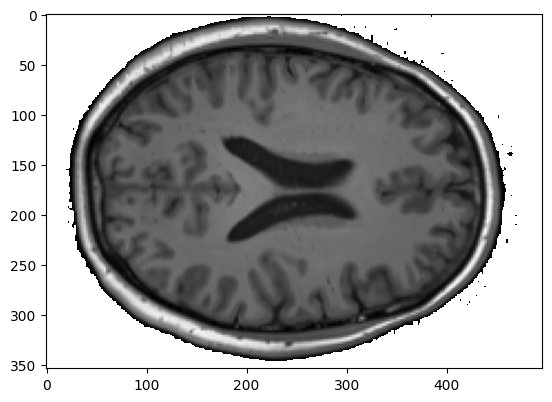

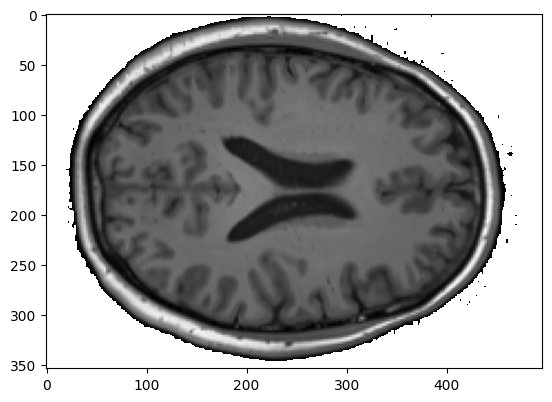

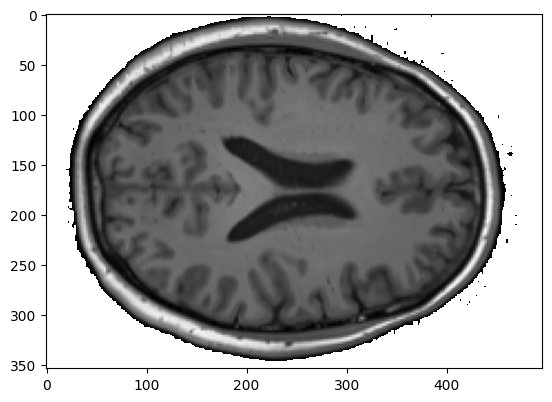

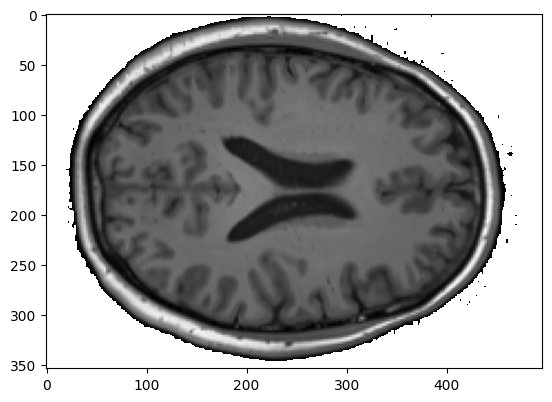

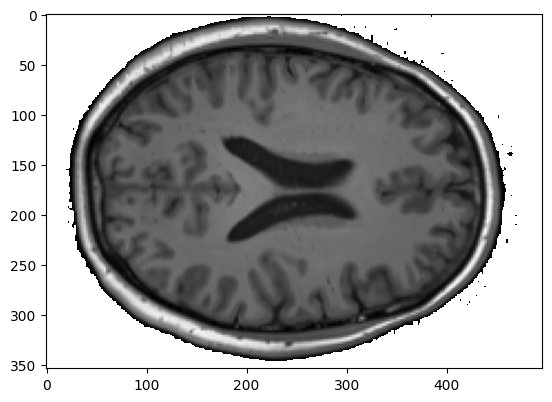

In [28]:
plt.imshow(filter_func_best(img, dir = None), cmap="gray")
plt.show()
plt.imshow(filter_func_best(img, dir = "left"), cmap="gray")
plt.show()
plt.imshow(filter_func_best(img, dir = "right"), cmap="gray")
plt.show()
plt.imshow(filter_func_best(img, dir = "top"), cmap="gray")
plt.show()
plt.imshow(filter_func_best(img, dir = "bottom"), cmap="gray")
plt.show()


In [29]:
for i in tqdm(range(len(file_list))):
    image = np.array(Image.open(file_list[i]).convert("L"))
    np.savez(os.path.join(ROOT_DIR, 'raw-data','syntheticMRI2D', NAME, 'toy-cleaned', file_names[i][:-4]), filter_func_best(image, dir = None))
    #Image.fromarray(filter_func_force(image)).save(os.path.join(ROOT_DIR, 'raw-data','toy-syntheticMRI-2D','axial', 'cleaned', file_names[i][:-3]+"tiff"))

100%|██████████| 999/999 [00:14<00:00, 69.81it/s]


In [30]:
cleaned_data_dir = os.path.join(ROOT_DIR, 'raw-data','syntheticMRI2D',NAME, 'toy-cleaned')
# iterate over files in that directory
file_list_cleaned = [os.path.join(cleaned_data_dir, filename) for filename in os.listdir(cleaned_data_dir) if filename != ".DS_Store"]
file_names_cleaned = os.listdir(cleaned_data_dir)

In [31]:
file_names_cleaned[0]

'sub-008021-sagittal-slice.npz'

In [32]:
#for file in file_list_cleaned:
 #   image = npz_opener(file)
  #  plt.imshow(image, cmap = "gray")
   # plt.show()